In [20]:
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack as fftpk
import numpy as np
from scipy.fft import rfft, rfftfreq
from scipy.io.wavfile import write
from matplotlib import pyplot as plt

In [21]:
# ./audio.wav (relative file)
file_name = "10khz-sine-noise"
sample_rate, signal = wavfile.read(file_name + ".wav")

ref_directory = "separate_waveform_approach"

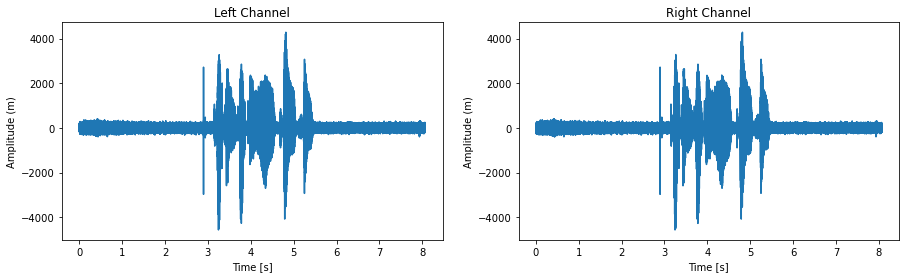

In [22]:
# duration = len(signal) / sample_rate
# time = np.arange(0, duration, 1 / sample_rate) #time vector

length = signal.shape[0] / sample_rate
time = np.linspace(0., length, signal.shape[0])

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.plot(time, signal[:, 0], label="Left channel")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude (m)')
plt.title("Left Channel")

plt.subplot(1, 2, 2)
plt.plot(time, signal[:, 1], label="Right channel")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude (m)')
plt.title("Right Channel")

plt.subplots_adjust(wspace=0.2, 
                    hspace=0)


plt.savefig(ref_directory+'/image1-waveform.jpg', dpi=300)
plt.show()

In [23]:
left_channel = []
right_channel = []

for i in range(len(signal)):
    left_channel.append(signal[i][0]) #+ signal[i][1]
    right_channel.append(signal[i][1])


# plt.plot(add)
# plt.title("Combined Waveform")
# plt.show()

In [24]:
N = sample_rate * int(time[-1])

print(N)

FFT_L = rfft(left_channel)
FFT_R = rfft(right_channel)

FFTFREQ = rfftfreq(N, (1 / sample_rate))

352800


C:\Users\benwh\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


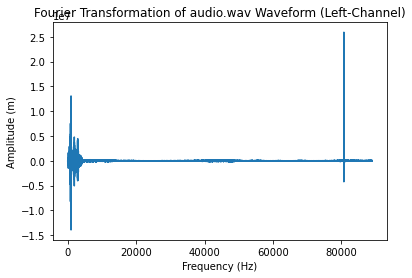

In [25]:
plt.plot(FFT_L[range(len(FFT_L)//2)])                                                          
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (m)')
plt.title('Fourier Transformation of audio.wav Waveform (Left-Channel)')
plt.savefig(ref_directory+'/image2-frequency.jpg', dpi=1200)
plt.show()

In [26]:
import numpy as np

threshold_left = np.percentile(FFT_L, 95)
threshold_right = np.percentile(FFT_R, 95)

# print('Iterating ' + str(len(FFT_L)//2) + ' for [!>]:' + str(threshold))

In [27]:
LOWER_LIM = 125
UPPER_LIM = 8000

UPPER_FREQ_LIM_L = FFTFREQ[len(FFT_L)//2] # 11120.875Hz (when using 10khz example)
UPPER_FREQ_LIM_R = FFTFREQ[len(FFT_R)//2] # 11120.875Hz (when using 10khz example)

print(UPPER_FREQ_LIM_L, UPPER_FREQ_LIM_R)
largest_value = 0

for i in range(len(FFT_L)//2):
    if FFT_L[i] > largest_value:
        largest_value = FFT_L[i]

    if FFTFREQ[i] > UPPER_LIM or FFTFREQ[i] < LOWER_LIM:
        FFT_L[i] = 0
        FFT_R[i] = 0

    if FFTFREQ[i] > 2000 and FFTFREQ[i] < 3000:
        FFT_L[i] = 0
        FFT_R[i] = 0

print(len(FFT_L) // 2)
# SNR = (sum / (len(FFT_L)//2)) ** 0.5
# print((sum / (len(FFT_L)//2)) ** 0.5)

11120.875 11120.875
88967


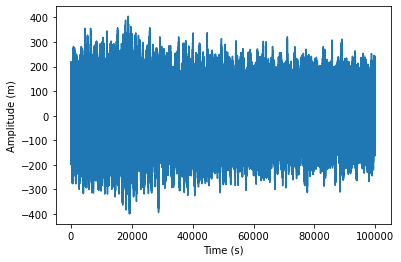

C:\Users\benwh\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


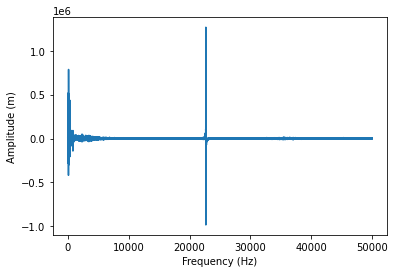

Noise Power (147752.66747508984+85531.6357255862j)


In [28]:
POWER_NOISE = 0

for i in range(0, 25000):
    squared = FFT_L[i] ** 2
    POWER_NOISE += squared

POWER_NOISE = (POWER_NOISE / 25000) ** 0.5

plt.plot(left_channel[:100000])                                                           
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.show()

noise_profile = left_channel[:100000]
FFT_NOISE = rfft(noise_profile)

plt.plot(FFT_NOISE)                                                           
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (m)')
plt.show()

print("Noise Power", POWER_NOISE)

max_noise = 0
# Now we can derrive a SNR for each individual noise frequency
for i in range(len(FFT_NOISE)):
    if FFT_NOISE[i] > max_noise:
        max_noise = FFT_NOISE[i]

NOISE_INDEXES = np.array([])

# Corresponding FreqResDiagram
for i in range(len(FFT_NOISE)):
    freq_power = FFT_NOISE[i] / max_noise
    NOISE_INDEXES = np.append(NOISE_INDEXES, freq_power)

In [29]:
POWER_SIGNAL = 0

for i in range(75000, 125000):
    squared = FFT_L[i] ** 2
    POWER_SIGNAL += squared

POWER_SIGNAL = (POWER_SIGNAL / 50000) ** 0.5

In [30]:
SNR = POWER_SIGNAL / POWER_NOISE
print(SNR)

(0.005576776277881743+0.00630603949676638j)


In [31]:
for i in range(len(NOISE_INDEXES)):
    # Default gain is set to 0db for those exceeding the threshold, but for each value that exceeds the threshold lowly (below),
    # instead receive a -18db reduction //0.0+0.j
    frequency = FFTFREQ[i]

    # print(FFT_L[i], NOISE_INDEXES[i])

    FFT_L[i] *= (1 - NOISE_INDEXES[i])
    FFT_R[i] *= (1 - NOISE_INDEXES[i])

C:\Users\benwh\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


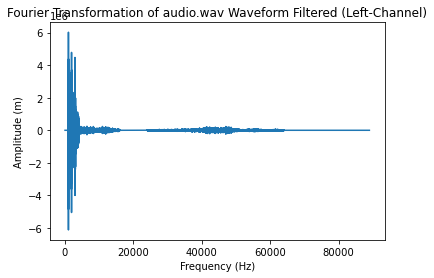

In [32]:
plt.plot(FFT_L[range(len(FFT_L)//2)])                                                           
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (m)')
plt.title('Fourier Transformation of audio.wav Waveform Filtered (Left-Channel)')
plt.savefig(ref_directory+'/image3-de_noised.jpg', dpi=1200)
plt.show()

# import math

# dBLeft = []
# for i in range(len(FFT_L)//2):
# #     dBLeft[i] = 20 * math.log(FFT_L[i], 10)

# plt.plot(dBLeft)                                                           
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude')
# plt.title('Fourier Transformation of audio.wav Waveform Filtered (Left-Channel)')
# plt.savefig(ref_directory+'/image3-de_noised.jpg', dpi=1200)
# plt.show()

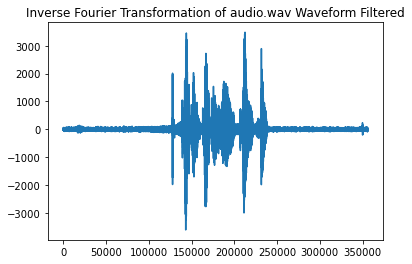

In [33]:
from scipy.fft import irfft

de_noised_left = irfft(FFT_L)
de_noised_right = irfft(FFT_R)

plt.plot(de_noised_left) 
plt.title('Inverse Fourier Transformation of audio.wav Waveform Filtered')
# plt.savefig('img/image5-de_noised_waveform.jpg', dpi=1200)
plt.show()

In [34]:
K = 32767 #32767
norm_new_sig_l = np.int16(de_noised_left * (K / de_noised_left.max()))
norm_new_sig_r = np.int16(de_noised_right * (K / de_noised_right.max()))



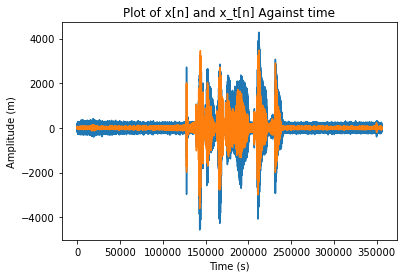

Noisy 0.023146287798531475
Denoised 3.0349203305608073e-16
Delta 76266541712658.7


In [35]:
plt.plot(left_channel)
plt.plot(de_noised_left)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.title("Plot of x[n] and x_t[n] Against time")
plt.savefig(ref_directory+'/image7-de_noised.jpg', dpi=500)
plt.show()

combined_channel = []

for i in range(len(de_noised_left)):
    combined_channel.append([de_noised_left[i], de_noised_right[i]]) #+ signal[i][1]

print("Noisy", np.average(left_channel))
print("Denoised", np.average(de_noised_left))
print("Delta", (np.average(left_channel) - np.average(de_noised_left)) / np.average(de_noised_left))

write(file_name + "-cleanboth.wav", sample_rate, np.array(combined_channel, dtype=np.int16))

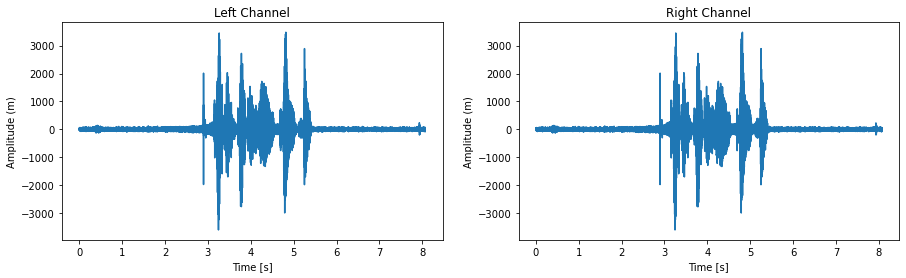

In [36]:
# ./audio.wav (relative file)
file_name = "10khz-sine-noise-cleanboth"
sample_rate, signal = wavfile.read(file_name + ".wav")

ref_directory = "combined_waveform_approach"

# duration = len(signal) / sample_rate
# time = np.arange(0, duration, 1 / sample_rate) #time vector

length = signal.shape[0] / sample_rate
time = np.linspace(0., length, signal.shape[0])

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.plot(time, signal[:, 0], label="Left channel")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude (m)')
plt.title("Left Channel")

plt.subplot(1, 2, 2)
plt.plot(time, signal[:, 1], label="Right channel")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude (m)')
plt.title("Right Channel")

plt.subplots_adjust(wspace=0.2, 
                    hspace=0)


plt.savefig(ref_directory+'/image6-waveform.jpg', dpi=300)
plt.show()